# 乳癌(breast_cancer)診斷https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

## 載入相關套件

In [1]:
#載入sklearn模組，並使用內建資料集
from sklearn import datasets
from sklearn.model_selection import train_test_split #from 命名空間.函數名(避免函數撞名，前面要加上模組名稱)
from sklearn.metrics import accuracy_score
#import * import後面可加*表示引入所有函數，但此方式較耗時且之後呼叫會發生問題

## 1. 載入資料集

In [2]:
#使用load_iris()載入資料集
ds = datasets.load_breast_cancer()
#使用sklearn模組讀入資料集為dataset格式，並非dataframe

## 2. 資料清理、資料探索與分析

In [4]:
# 資料集說明DESCR，一定要大寫
print(ds.DESCR)
#569筆資料，應變數Y=2個classes分類變數(212 - Malignant惡性, 357 - Benign良性)
#解釋變數X有30個且為numeric數值型(連續型)
# X=關於腫瘤的資訊(半徑、質地、區域等)
# Y=WDBC-Malignant惡性、WDBC-Benign良性
#跑X變數的基本統計量
#列出是否有missing

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
#看解釋變數X欄位內容
#使用pandas模組將dataset匯入成dataframe格式(表格形式)並存為df
#pd.DataFrame(檔案名,columns=欄位名)
import pandas as pd
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
#看應變數Y欄位內容
#使用sklearn模組target函數
y = ds.target
y
#共有569筆內容為0、1
#注意:0=惡性;1=良性

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
#使用sklearn模組target_names函數顯示Y內容名稱
ds.target_names
#'malignant'=0, 'benign'=1

array(['malignant', 'benign'], dtype='<U9')

In [8]:
#可丟進演算法中的資料集內容需有2種特徵
#1.內容都只能是數值、2.內容不能有missing value
# 觀察資料集解釋變數X的彙總資訊info()
df.info()
#結果顯示30種變數X的Non-Null Count欄(沒有missing value筆數)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# 描述統計量describe()
#可在最後加上.T將輸出內容轉置(解釋變數X在列;統計值在欄)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: >

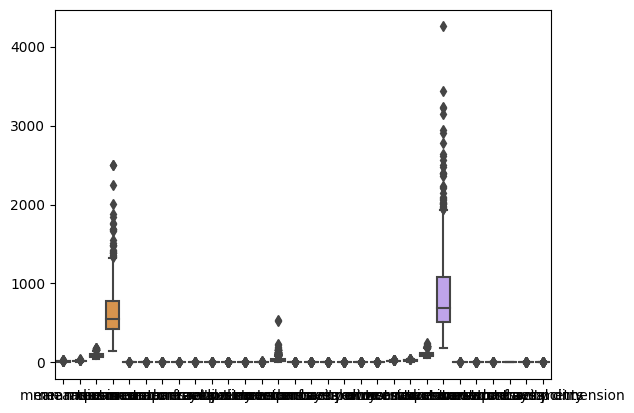

In [10]:
# 箱型圖 使用seaborn模組boxplot()
#輸出解釋變數X的箱型圖分布
import seaborn as sns
sns.boxplot(data=df)
#因解釋變數的單位不同，故無法用箱型圖看出相關性資訊

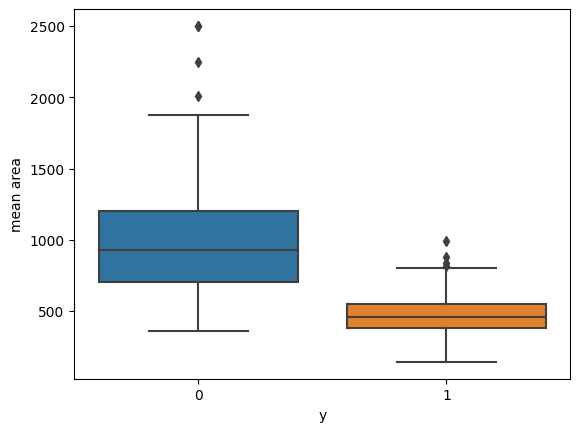

In [13]:
#輸出解釋變數X mean area(腫瘤區塊大小)與應變數Y的箱型圖分布
df2=df.copy()#建一個空資料集df2，內容為將df複製進去
df2['y'] = y #將df2再加入應變數Y
sns.boxplot(x='y', y='mean area',data=df2);#設定x軸與y軸
#結果可看出應變數y(腫瘤良惡性)與mean area，無明顯重疊性
#表示mean area與y腫瘤良惡性有明顯相關性

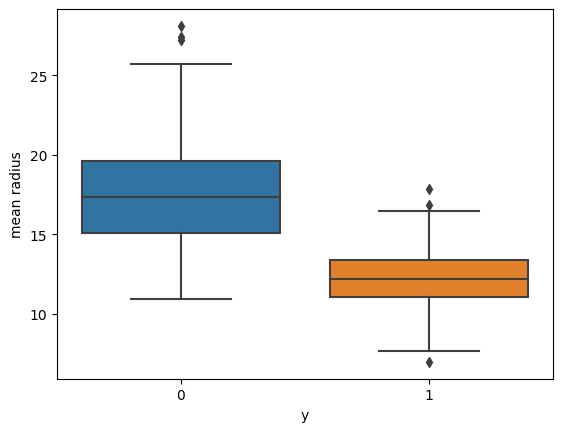

In [15]:
#輸出解釋變數X mean radius(腫瘤半徑)與應變數Y的箱型圖分布
#df2已建立，所以不用前兩句語法
#df2=df.copy()#建一個空資料集df2，內容為將df複製進去
#df2['y'] = y #將df2再加入應變數Y
sns.boxplot(x='y', y='mean radius',data=df2);#設定x軸與y軸
#結果可看出應變數y(腫瘤良惡性)與mean area，無明顯重疊性
#表示mean radius(腫瘤半徑)與y腫瘤良惡性有明顯相關性

In [16]:
# 是否有含遺失值(Missing value)
#使用isnull()計算missing數值
#.sum()表示按照欄位名稱列出
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [17]:
#使用.sum().sum()將個別統計的missing值再做加總
df.isnull().sum().sum()
#結果=0

0

## 繪圖

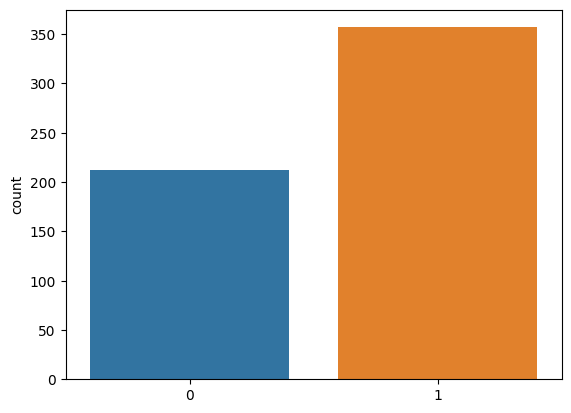

In [18]:
# y 各類別資料筆數統計，確認資料有無不平衡
import seaborn as sns
sns.countplot(x=y);
#因應變數Y內容為二類0(惡性)有200筆;1(良性)有350筆，並無資料不平衡

In [19]:
# 以Pandas函數統計各類別資料筆數
pd.Series(y).value_counts()

1    357
0    212
dtype: int64

## 3. 不須進行特徵工程(老師補充)

## 4. 資料分割

In [20]:
#將資料集切為訓練資料、測試資料集
#可使用pandas模組切割
#但分割資料集時，要注意要先將資料集內容打亂，以此檔案為例，Y資料是按照0、1、2排序，若切點為前100筆+後50筆時，Y=2的資料無法進入訓練模型中
#資料打散可使用train_test_split(X欄名, y欄名, test_size=.2 , shuffle=True)
#為了要讓X有對應的y，兩者要同時丟入，test_size=切檔比例=20%
#train_test_split()其中參數
#shuffle=打亂&洗牌，預設為True,
#當使用時間數列資料時(如:股市、航空運輸量)，就不希望檔案做打亂&洗牌，則可使用shuffle=False
#stratify=按母體某欄位比例切割(分層抽樣)，預設為None,
#當使用抽樣調查需按照男性:女性=6:4分層抽樣時可使用
#raandom_state=固定切割，預設為None
#因每次皆為隨機切割，每次結果都不同;若要看到相同結果，則可使用raandom_state=int
# 指定X，並轉為 Numpy 陣列
X = df.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
#結果會產生4個資料集

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#切為(455筆,30個維度(欄)),(114筆,30個維度(欄)),(455筆,1維度),(114筆,1維度)

((455, 30), (114, 30), (455,), (114,))

In [21]:
y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

## 特徵縮放

In [22]:
#將參數做特徵縮放，會放在步驟4資料切割後
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#建立一個標準化的欄位
X_train_std = scaler.fit_transform(X_train)#將訓練資料集丟進訓練模型
X_test_std = scaler.transform(X_test)#將測試資料集丟進測試模型
#測試模型需為公平且不受影響之資料集

## 5. 選擇演算法

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [24]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型評估

In [25]:
y_pred = clf.predict(X_test_std)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0])

In [26]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%')

94.74%


In [28]:
clf.score(X_test_std, y_test)

0.9473684210526315

In [27]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[39  4]
 [ 2 69]]


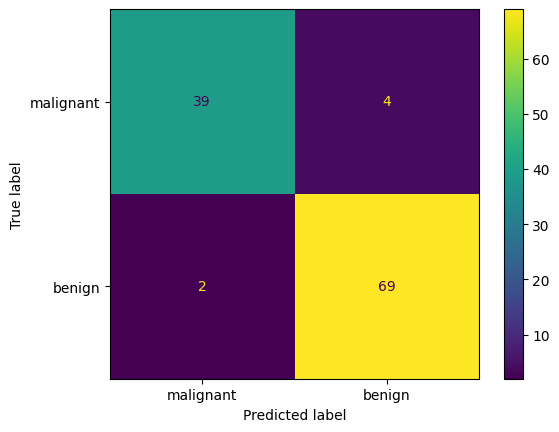

In [29]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=ds.target_names)
disp.plot()
plt.show()

## 8. 模型評估，暫不進行

In [30]:
from sklearn.svm import SVC
clf2 = SVC()

#6. 模型訓練
clf2.fit(X_train_std, y_train)


#7. 模型評估
clf2.score(X_test_std, y_test)

0.956140350877193

In [31]:
from sklearn.svm import SVC
clf3 = SVC(kernel='linear')#使用SVC中的線性組合跑

#6. 模型訓練
clf3.fit(X_train_std, y_train)


#7. 模型評估
clf3.score(X_test_std, y_test)

0.9473684210526315

## 9. 模型佈署

In [ ]:
# 模型存檔
import joblib

joblib.dump(clf, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib');

## 10.模型預測，請參見 01_05_iris_prediction.py